In [1]:
cd ..

/home/ubuntu/mini-metro


In [ ]:
from plugins.SerpentMiniMetroGamePlugin.files.api.object_detector.pytorch_detector import PytorchObjectDetector
import skimage.io
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
model_path = 'ml_train/station_detector/pytorch/models/m2.2/checkpoints/station_detector_pt_yolov3_m1_cpkt_15.pth'
config_path = 'ml_train/station_detector/pytorch/models/m2.2/yolov3-custom.cfg'
labels_path = None
img_size = 416
conf_threshold = 0.5
nms_threshold = 0.1

In [6]:
station_detector = PytorchObjectDetector(model_path, config_path, labels_path, img_size)

### Running inference and plotting results on 'test' images

In [7]:
img_paths = list(Path("ml_train/station_detector/pytorch/data/test").glob("*.png"))
img_filenames = [img_path.name for img_path in img_paths]

In [8]:
%%time
images = [skimage.io.imread(img_path) for img_path in img_paths]

detection_results = [station_detector.predict(image, conf_threshold, nms_threshold) for image in images] 

CPU times: user 42.9 s, sys: 1.22 s, total: 44.1 s
Wall time: 22.6 s


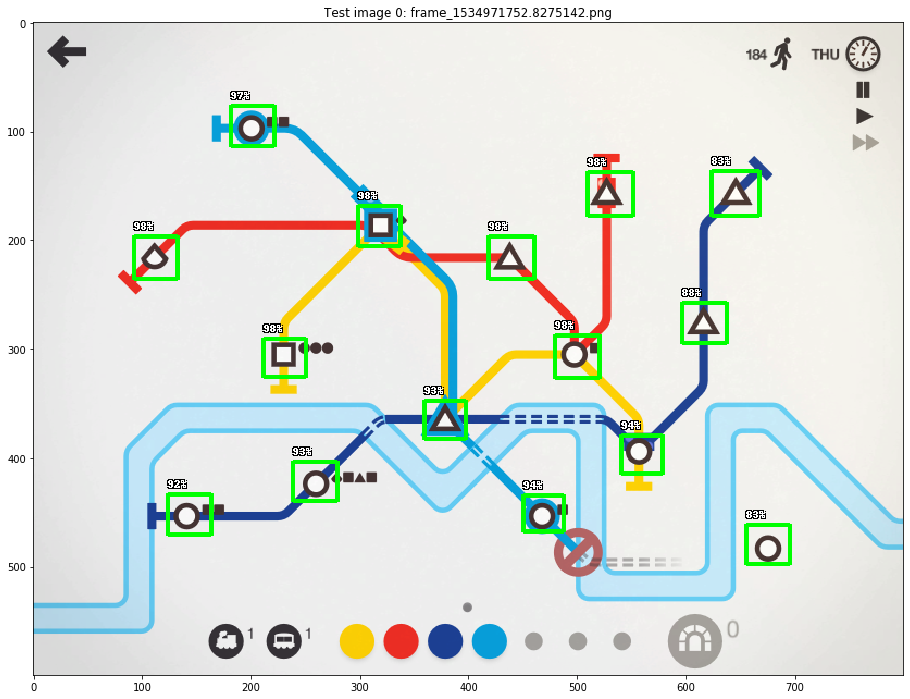

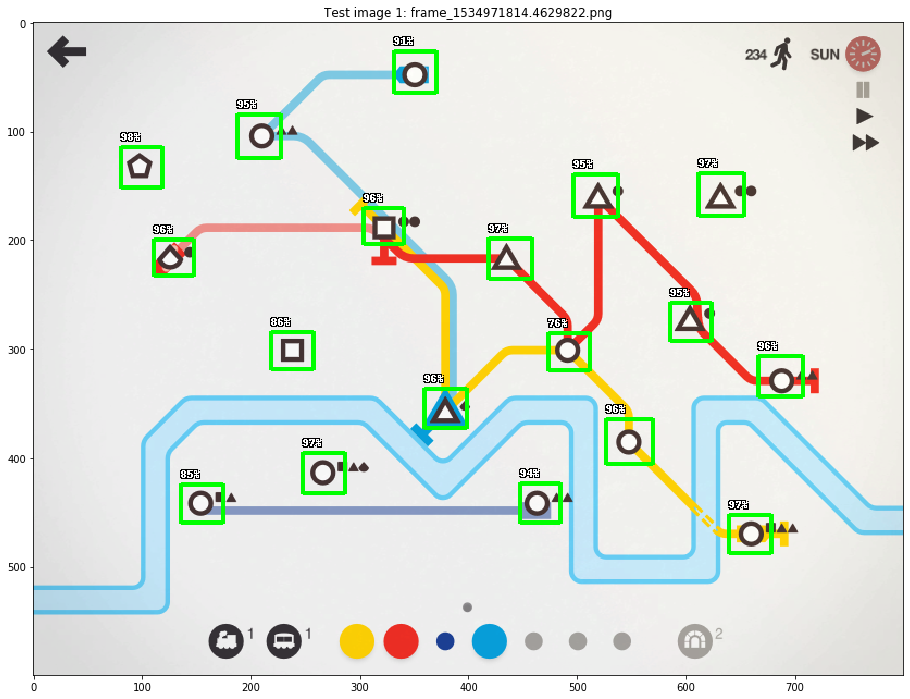

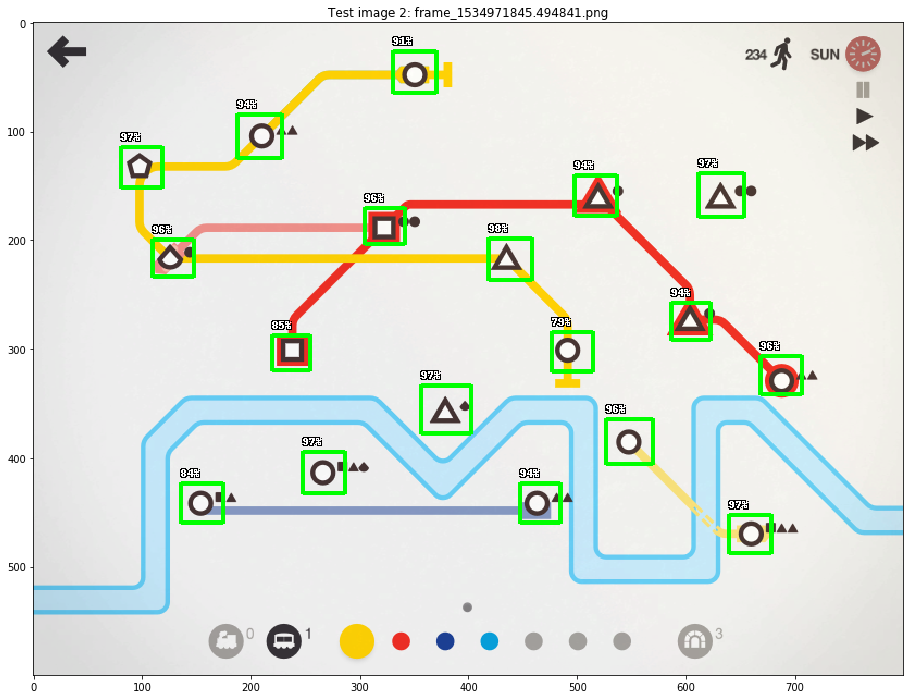

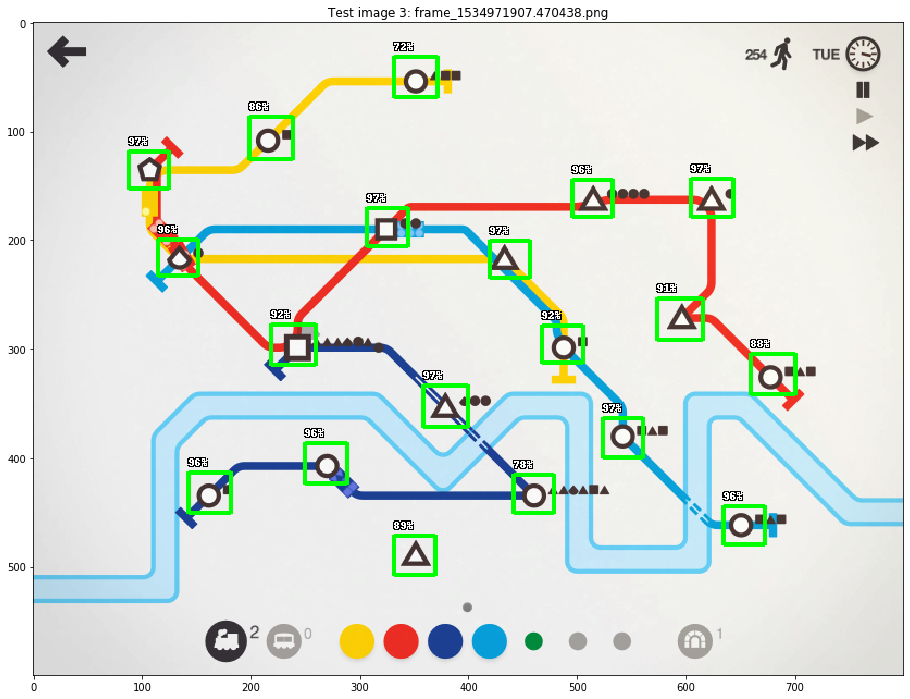

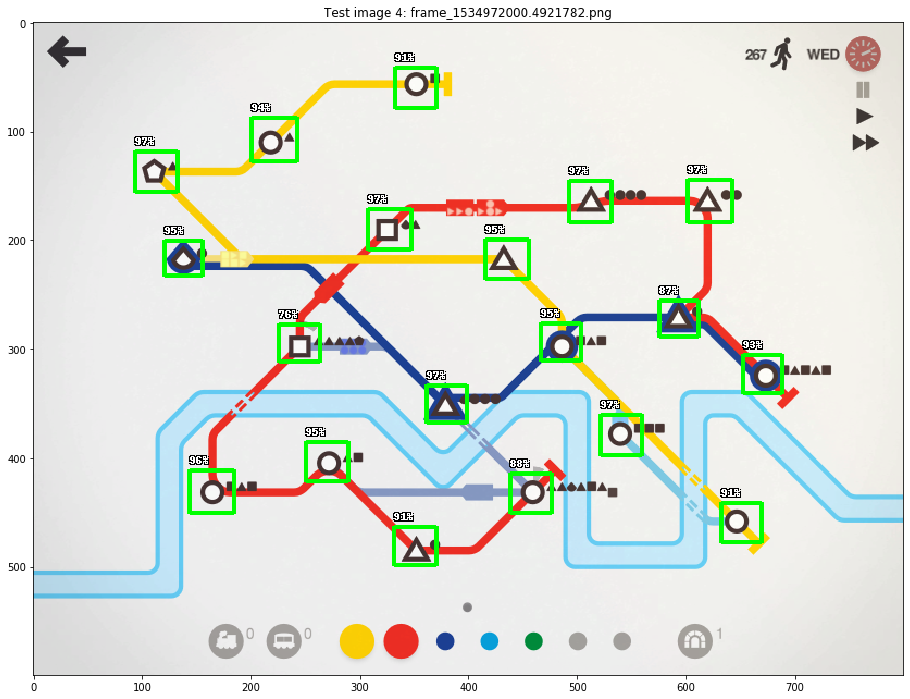

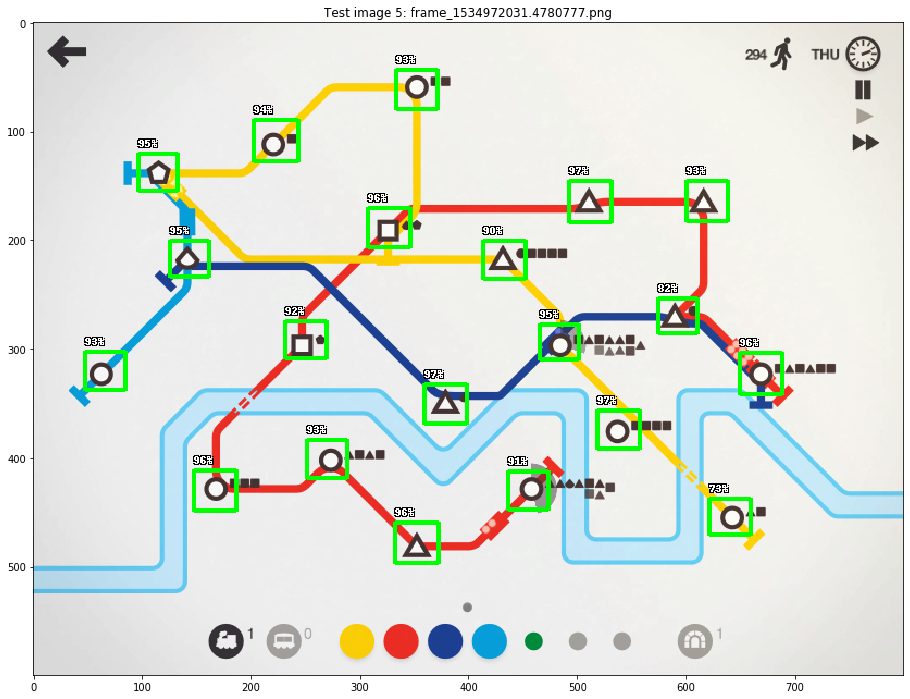

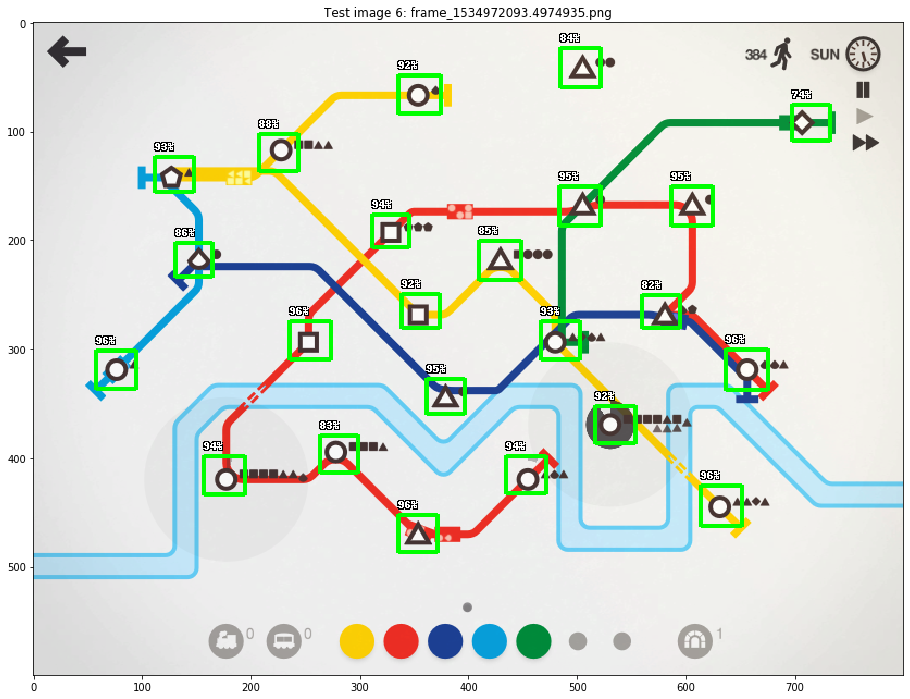

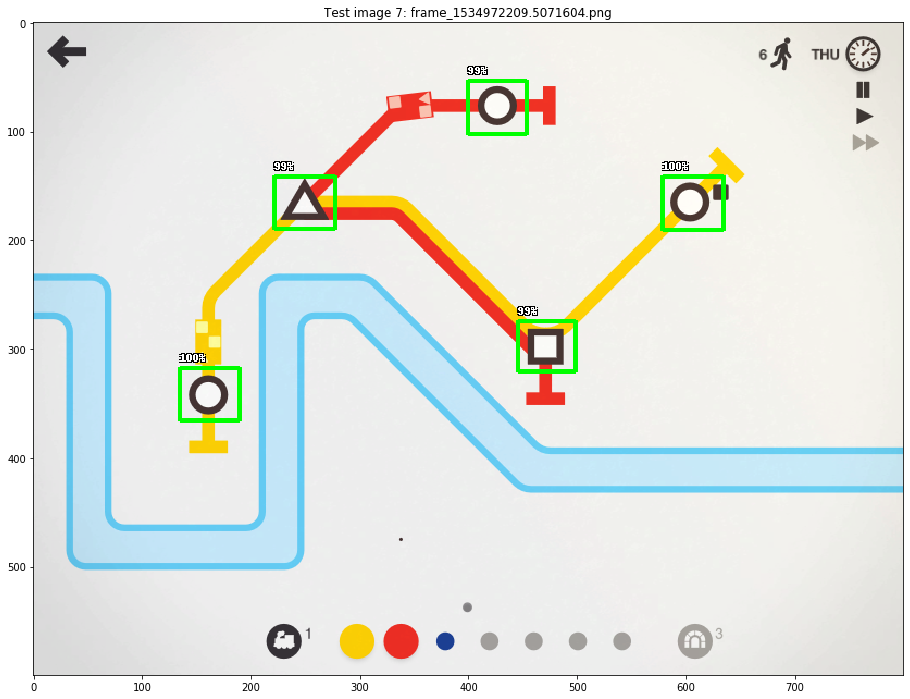

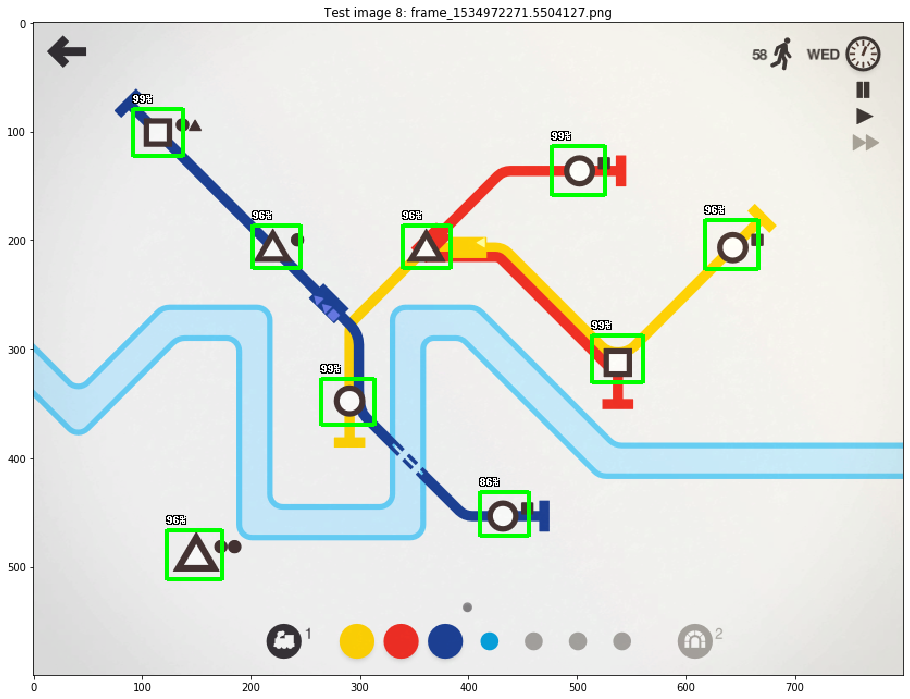

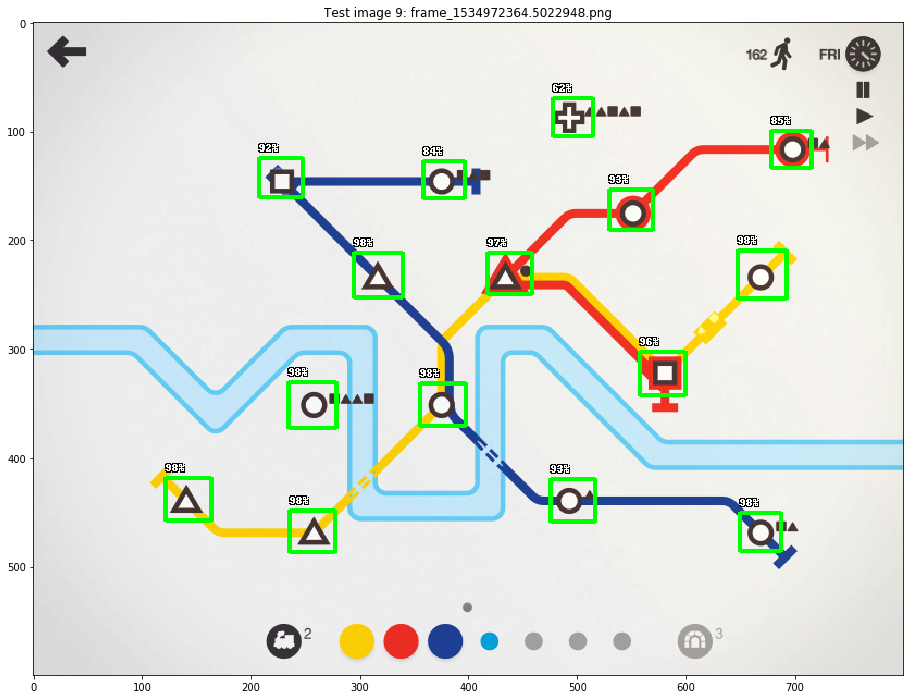

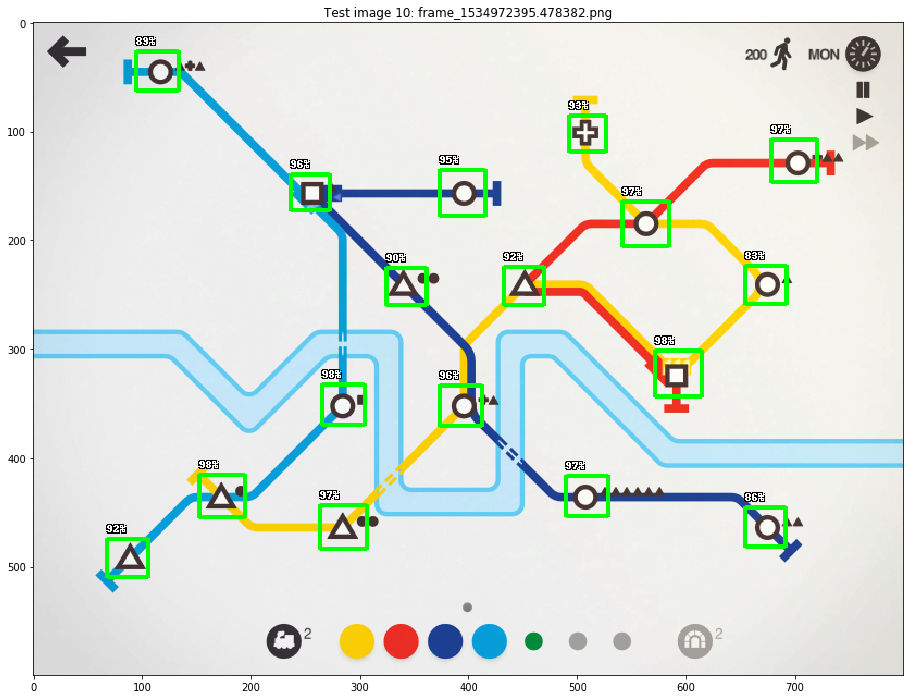

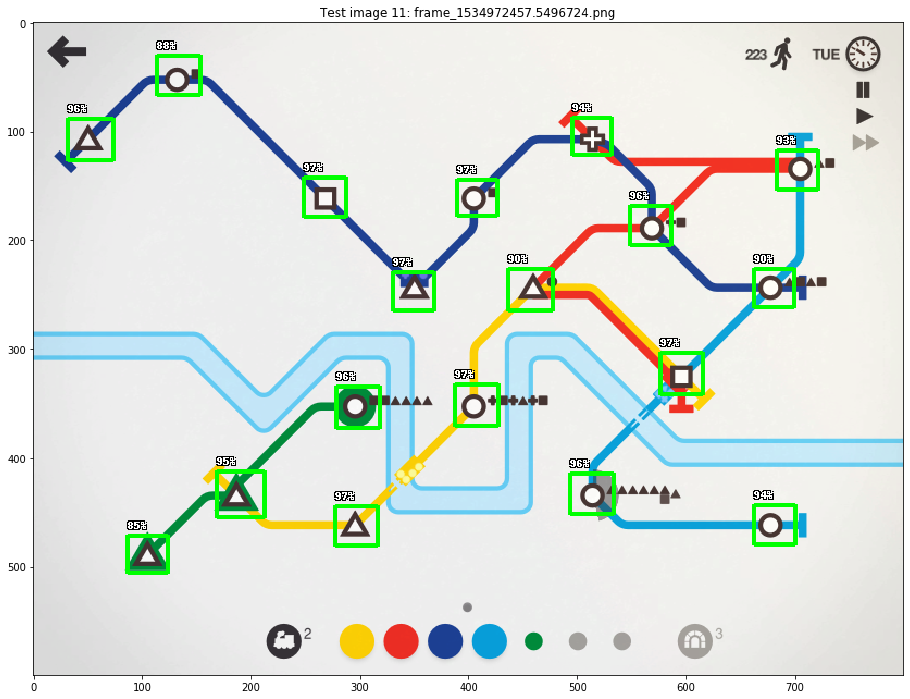

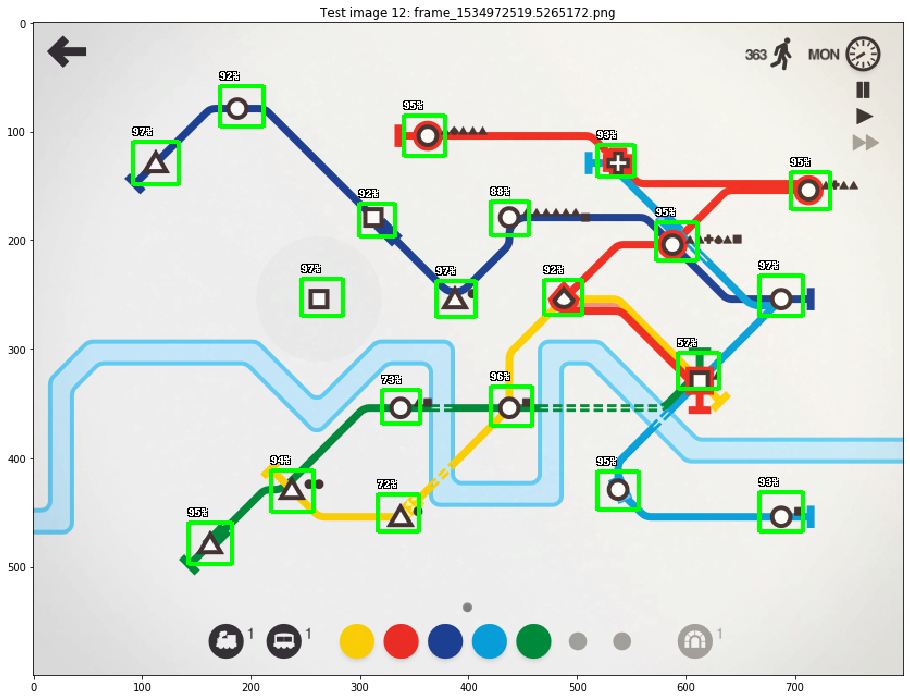

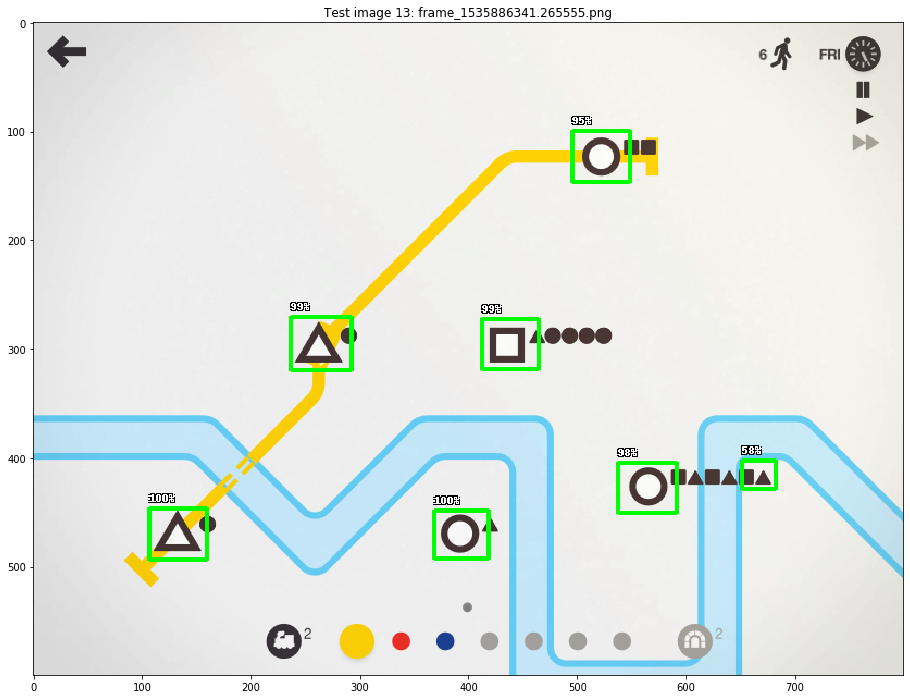

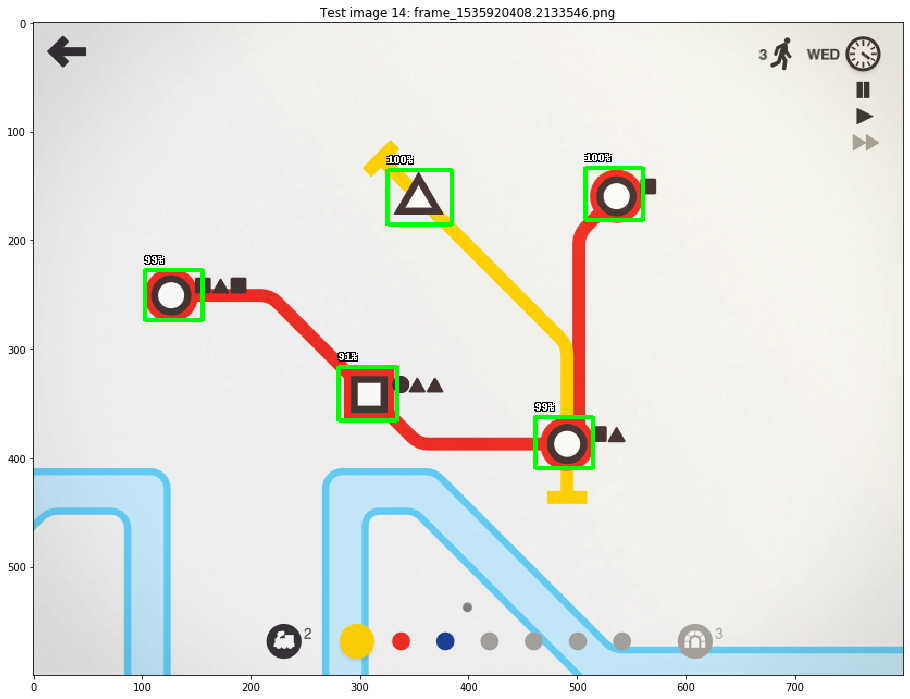

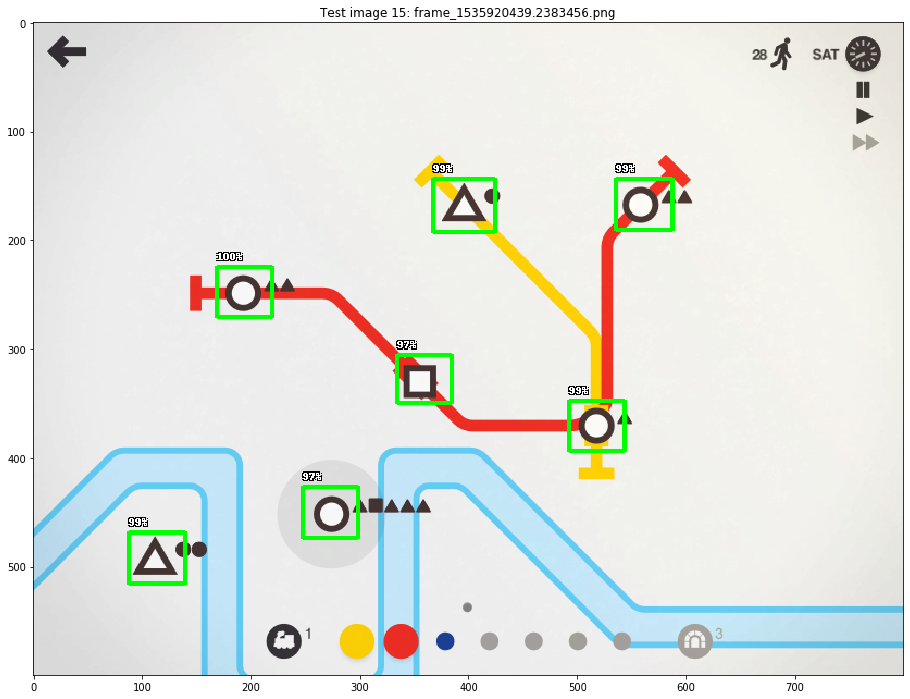

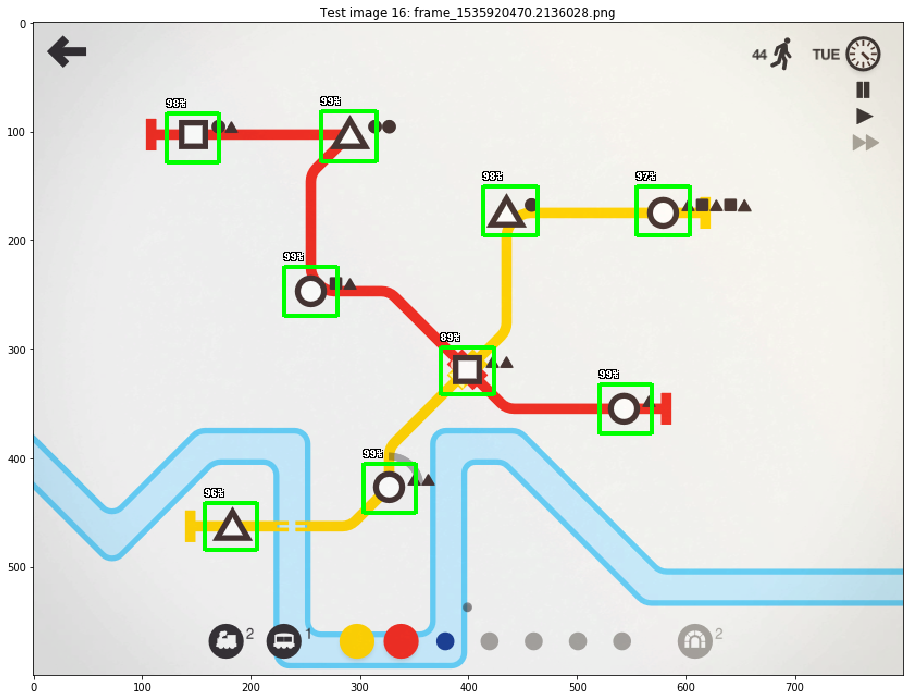

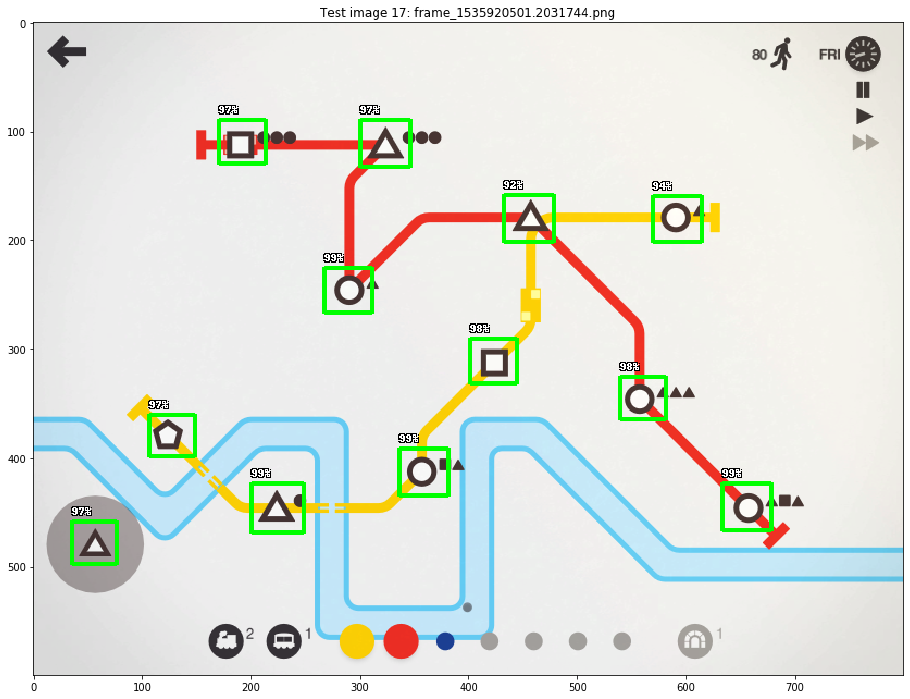

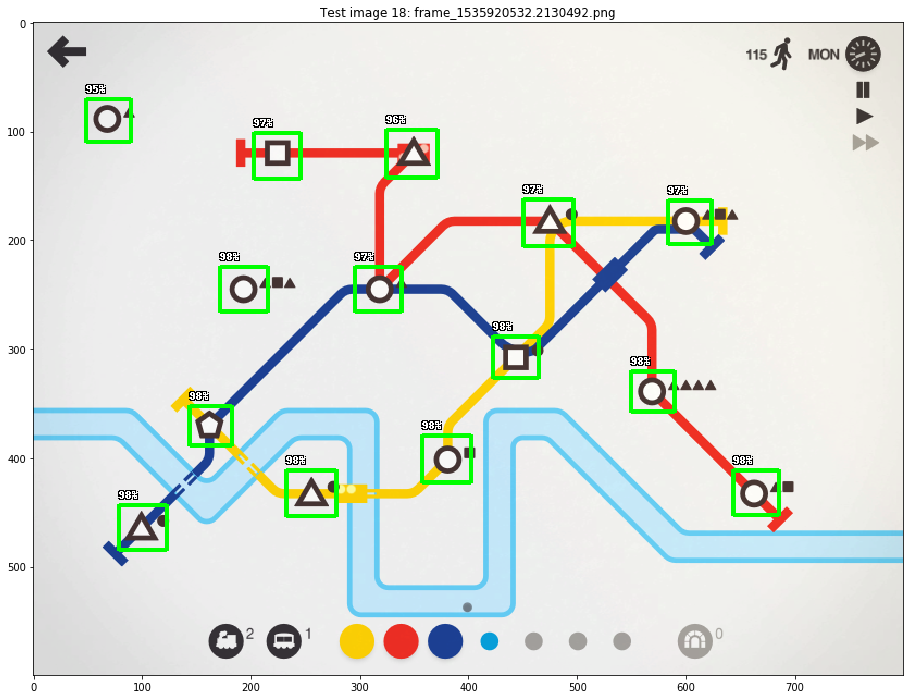

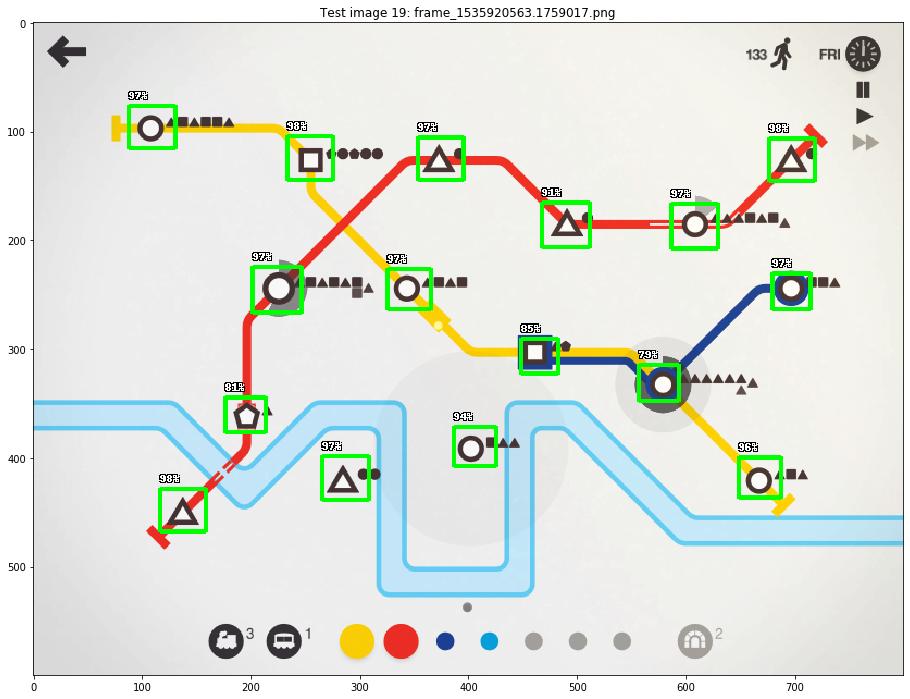

In [9]:
for i, (image, img_filename, detection_result) in enumerate(zip(images, img_filenames, detection_results)):
    _, ax = plt.subplots(figsize=(22,12))
    image_box = station_detector.draw_bounding_boxes(image, **detection_result) 
    ax.set_title(f"Test image {i}: {img_filename}")
    ax.imshow(image_box);